# Parameter Estimation

We often have the following problem: we observe data $x_0, x_1, \ldots, x_{N-1}$ that come from some common underlying distribution, $F_X(x)$. However, the details of the underlying distribution are not completely known. In this section, we consider the problem of estimating parameters of the distribution, such as the mean and variance. Let $\theta$ denote some parameter of the distribution that we wish to estimate. Then there are two different philosophies for how to treat $\theta$, and these different philosophies result in different mathematical approaches:
* $\theta$ can be treated as constant, but unknown. The parameter $\theta$ is not considered deterministic (not random). This is considered *classical parameter estimation* and is the approach taken in this section.
* $\theta$ can be considered to be random. This typically results in a Bayesian approach to parameter estimation in which the *a posteriori* distribution for $\theta$ is determined from the data and some *a priori* distribution on $\theta$. 

In this section, the discussion and examples use continuous random variables, so the mathematics will use density functions $f_X(x)$. In most cases the results generalize to discrete random variables if the pdf are replaced by PMFs.  It is helpful to make explicit the effect on the density function of the parameter(s) being estimated; i.e., we want to show that the density at some point $x$ depends on $\theta$. We will use $f_X(x;\theta)$ to make this effect clear. We do not use use a conditioning bar ($|$) here because $\theta$ is not a value of a random variable.

The correct way to interpret $f_X(x;\theta)$ is that it represents a family of density functions for different values of $\theta$. For instance, if $\theta$ is the parameter of an exponential random variable, then some of the possible density functions are shown below:


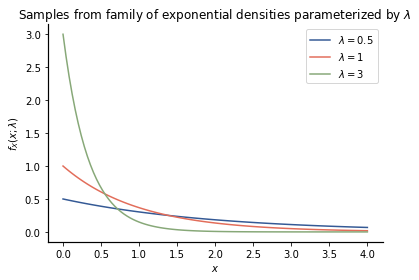

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

x = np.linspace(0,4, 101)

for l in [0.5, 1, 3]:
  X = stats.expon(scale=1/l)
  plt.plot(x, X.pdf(x), label=f'$\lambda={l}$' )
  
plt.title('Samples from family of exponential densities parameterized by $\lambda$')
plt.xlabel('$x$')
plt.ylabel('$f_X(x;\lambda)$')
plt.legend();

Now suppose we have samples from some exponential density $f_X(x;\lambda)$? How should we estimate $\lambda$? More generally, how should we estimate $\theta$ from the observations $x_0, x_1, \ldots, x_{N-1}$? First, let's simplify the notation for the observations by writing them as a *vector*:

````{card}
DEFINITION
^^^
```{glossary}
vector
    An ordered list of numbers, usually shown enclosed in square brackets and separated by commas.
```
````



Vectors are similar to Python's lists and tuples. In this text, we will use bold, lower-case letters to denote vectors. For instance, we can write a vector of the squares of the first five  counting numbers as $\mathbf{x} = \left[ 1, 4, 9, 16, 25\right]$. Since it is hard to handwrite bold letters, we will use underlined lower-case letters to represent vectors when we write them by hand. We will collect our observed data into a vector

$$
\mathbf{x} = \left[ x_0, x_1, \ldots, x_{N-1} \right].
$$


We wish to estimate $\theta$ from $\mathbf{x}$. We will use "hats" on an item to indicate that item is being estimated.

````{card}
DEFINITION
^^^
```{glossary}
estimate
    Given a vector of observed values $\mathbf{x}$ from a common distribution, an *estimate* for a parameter $\theta$ is a numerical value $\hat{\theta}$ that is a function of the observed data.
```
````



Given the data $\mathbf{x}$, let the estimate for $\theta$ be the value of a function evaluated on the data, $\hat{\theta}= g(\mathbf{x})$. Then the main problem of parameter estimation is how to choose a **good** function. Rather than choose a function for one specific set of data $\mathbf{x}$, we want to choose a function that will have good properties for any data. In this case, the data itself becomes a vector of random variables, which we will denote by a bold upper-case letter. The random data is then $\mathbf{X} = \left[ X_0, X_1, \ldots, X_{N-1} \right].$ If we apply a function to the data to create an estimated value, its output will itself be a random variable, which we call an *estimator*:

````{card}
DEFINITION
^^^
```{glossary}
estimate
    Given a vector of random variables $\mathbf{X}$ from a common distribution, an *estimator* for a parameter $\theta$ of the distribution is a random variable $\hat{\Theta}$ that is a function of the random variables.
```
````



If our estimator is $\hat{\Theta} = g(\mathbf{X})$, then we wish to choose the function $g()$ such that the estimator has good properties. However, we need to define what we mean by "good". Our first step is to introduce some additional terminology.


## Terminology

Let $\mathbf{X}$ be random variables from a common distribution with parameter $\theta$ and let $\hat{\Theta}=g(\mathbf{X})$ be an **estimator** for  $\theta$. Then we define the following term:

* The **estimator error** is  $\hat{\Theta} - \theta$.


* The **estimator bias** is the difference between the mean value of the estimator and the true value of the parameter, $ E[\hat{\Theta}] - \theta$

* An estimator is said to be **unbiased** if $E[\hat{\theta}] = \theta$; i.e. if the estimator bias is zero.


## Estimating Mean and Variance

Suppose that $X=\{X_1,X_2,\cdots, X_N\}$ are independent observations that come from a common distribution. For our purposes, we do not define provide a technical definition for independence of multiple random variables. Informally, independence generally means:
* the randomness associated with different random variables came from separate random sources, and
* knowing the value of one or more of the random variables does not change the distribution of any of the remaining random variables.

### Estimating the Mean

Let $\mu_X$ denote the mean of the distribution of the random variables. Then $\mu_X$ is usually estimated via the **sample mean**, 

$$
\hat{\mu}_X = \frac{1}{N} \sum_{i=0}^{N-1} X_i
$$

The expected value of the sample mean estimator is 

\begin{align*}
E\left[\hat{\mu}_X \right]
&= E \left[\frac{1}{N} \sum_{i=0}^{N-1} X_i\right]\\
&=\frac{1}{N} \sum_{i=0}^{N-1} E \left[ X_i\right] ~~~(\mbox{by linearity})\\
&=\frac{1}{N} \sum_{i=0}^{N-1} \mu_X \\
&= \mu_X
\end{align*}
  
Thus, this estimator is **unbiased**.

In addition, the sample mean estimator can be shown to be the estimator that minimizes the sum of the mean-square errors to the data,
\begin{equation*}
\min_c E \left[ \sum_{i=0}^{N-1} (X_i -c)^2 \right] = \hat{\mu}_X.
\end{equation*}

(The derivation is not hard, but is outside the scope of this text. It follows by expanding the quadratic term, applying linearity of the expectation operator, taking the derivative of the left-hand side of the equation with respect to $c$, and setting the result to 0.)

### Estimating the Variance



The most natural estimator of $\sigma^2_X$ is the **sample variance**: $\hat{\sigma}^2_X = \frac{1}{N}\sum_{i=1}^N (X_i-\mu_X)^2$
    
This estimator is **biased**, since $E\left[\hat{\sigma}^2_X\right] = \frac{N-1}{N}\sigma_X^2$

We can obtain an **unbiased variance estimator** after some suitable scaling. This is the estimator: $\hat{\sigma}^2_X = \frac{1}{N-1}\sum_{i=1}^N (X_i-\mu_X)^2$

# Sum of Independent Gaussian RVs

Suppose now that we have two independent data samples, $X_1=\{X_,X_2,\cdots,X_N\}$ and $Y=\{Y_1,Y_2,\cdots,Y_N\}$, that we think can be modeled as coming from Gaussian distributions.

* So both samples are **independent and identically distributed (i.i.d.)**.

* If we observe a difference in the sample means for the two data sets, how can we determine analytically if the ensemble means are different?

* Let's assume that distributions for the two data sets have a common variance and we know the variance, $\sigma^2$.

We need to know a few more facts about **sums of independent Gaussian random variables**:

1. If $X$ and $Y$ are independent RVs, then

$$Var[X +Y] = Var[X]+Var[Y]$$

2. If $X$ and $Y$ are independent Gaussian random variables with

$$X \sim \text{Gaussian}(\mu_X, \sigma_X^2)$$

and

$$Y \sim \text{Gaussian}(\mu_Y, \sigma_Y^2)$$

Then

$$Z = X+Y \sim \text{Gaussian}(\mu_Z, \sigma_Z^2)$$

By linearity $\mu_z = \mu_X + \mu_Y$, and by the previous property $\sigma_Z^2 = \sigma_X^2 + \sigma_Y^2$.

3. If $Z$ is a Gaussian random variable, $aZ + b$ is also a Gaussian random variable.

Let's start by considering the statistics of a single sample mean,
    
$$\hat{\mu}_X = \frac{1}{N} \sum_{i=1}^N X_i$$

By the properties above, we can see:

* $\hat{\mu}_X$ is a Gaussian random variable

* The mean of $\hat{\mu}_X$ is $E[\hat{\mu}_X] = \mu_X$

* The variance of $\hat{\mu}_X$ is 

\begin{align}
Var\left[\frac{1}{N}\sum_{i=1}^N X_i\right] &= \frac{1}{N^2} Var\left[\sum_{i=1}^N X_i\right]\\
&= \frac{1}{N^2} \sum_{i=1}^N Var\left[X_i\right]\\
&= \frac{1}{N^2} \sum_{i=1}^N \sigma_X^2\\
&= \frac{\sigma_X^2}{N}
\end{align}
    
(Note that the variance of the sample mean decreases linearly with the number of samples. This can be used to show that the sample mean converges to the true mean if the variance of the original random variable is finite.)

# Binary Hypothesis Tests involving Sample Mean *with Known and Equal Variances*

Suppose we have samples from two populations

$$x_i, i=1,2,\dots,M$$

and

$$y_j, j=1,2,\dots,N$$

where $x_i$ and $y_j$ are observed vaues of random variables $X$ and $Y$, which are assumed to have common variance $\sigma^2$.

* Let the averages of the data samples be

$$\bar{x} = \frac{1}{M}\sum_{i=1}^{M} x_i \text{, and } \bar{y} = \frac{1}{N}\sum_{j=1}^{N} y_j$$

and denote the true means of the distributions $\mu_X$ and $\mu_Y$, respectively.

* Note that if the number of samples from each population is relatively large ($\geq 10$), then even if the original population does not have a Gaussian distribution, the averages will still be approximately Gaussian - Central Limit Theorem (TLC)

* **If $\bar{x} \neq \bar{y}$, how can we conduct a binary hypothesis test on whether the two populations have different means?**

* What is the null hypothesis?

**The means are the same: $\mu_X = \mu_Y$**

* Under the null hypothesis, compute the difference in the sample averages and determine the probability that a difference that large would be observed under the null hypothesis.

* Thus, our test statistic is the differentce in averages,

$$t = \bar{x} - \bar{y}$$

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from $f_X()$ and $f_Y()$, respectively. We can view $t$ as an instantiation of

$$T = \bar{\mu}_X - \bar{\mu}_Y$$

* If $\mu_X = \mu_Y = \mu$, then $E[\bar{\mu}_X] = E[\bar{\mu}_Y] = \mu$

* Then, by linearity

$$E[T] = E[\bar{\mu}_X - \bar{\mu}_Y] = E[\bar{\mu}_X] - E[\bar{\mu}_Y] = \mu - \mu = 0 = \mu_T$$

* We can compute the variance of $T$ under the null hypothesis as:

\begin{align}
Var[T] &= Var[\bar{\mu}_X - \bar{\mu}_Y] \\
&= Var[\bar{\mu}_X + (-\bar{\mu}_Y)] \\
&= Var[\bar{\mu}_X] + Var[-\bar{\mu}_Y] \\
&= Var[\bar{\mu}_X] + (-1)^2 Var[\bar{\mu}_Y] \\
&= \frac{\sigma^2}{M} + \frac{\sigma^2}{N} \\
& = \left( \frac{1}{M} + \frac{1}{N} \right) \sigma^2 \\
&= \sigma_T^2
\end{align}

* Finally, we can compute the probability of observing a difference in means as large as $t$. For convenience of discussion, assume $\bar{x} > \bar{y}$:

Let $t$ be the observed difference $\bar{x}-\bar{y} > 0$

Hypothesis test:

* What is $P(\text{see result as extreme under }H_0)$

    * One-sided Hypothesis test: 
    
    $$P(T \geq t | H_0) = Q\left(\frac{t-\mu_T}{\sigma_T}\right) = Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)$$
    
    * Two-sided Hypothesis test:
    
    $$P(|T| \geq t | H_0) = 2 Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)$$

## Example

The city of Gainesville claims the mean commute time on SW 24th Ave from I-75 to UF is 23 minutes with a variance of 50. A friend traveled that route 10 times over the last two weeks and had an average commute time of 27 minutes. Conduct a hypothesis test to determine whether the City of Gainesville’s model is reasonable. Reject the null hypothesis if $p < 0.01$.

**Null Hypothesis: city's model is correct**

$$X_i \sim \text{Gaussian}(23, \sigma_X^2 = 50)$$

* What is the probability that we oberved a result this extreme, i.e., $\hat{\mu} = 27 $mins?

$$\hat{\mu} = \frac{1}{10} \sum_{i=1}^{10} X_i\text{, (sample mean estimator)}$$

$$E[\hat{\mu}] = 23 = \mu$$

$$Var[\hat{\mu}] = \sigma^2_{\mu_X} = \frac{\sigma_X^2}{10} = \frac{50}{10} = 5$$

One-sided hypothesis test:

$$P(\hat{\mu} \geq 27) = P\left(\frac{\hat{\mu} - 23}{\sigma_{\mu_X}} \geq \frac{27 - 23}{\sigma_{\mu_X}}\right) = P\left( Z \geq \frac{27-23}{\sqrt{5}} \right) = Q\left(\frac{27-23}{\sqrt{5}}\right) = Q\left(\frac{4}{\sqrt{5}}\right)$$

Two-sided hypothesis test:

$$P(|\hat{\mu}| \geq 27) = 2Q\left(\frac{4}{\sqrt{5}}\right)$$

In [7]:
def q(x):
    return stats.norm.sf(x)

In [8]:
q(4/np.sqrt(5))

0.03681913506015133

In [9]:
2*q(4/np.sqrt(5))

0.07363827012030266

We cannot reject the null hypothesis because p>0.01.

# Binary Hypothesis Tests with *Unknown Variance*

In many cases, the variance(s) of the underlying distributions are not known and must be estimated from the data.

In this case, the underlying distribution is even more spread out from the mean than the Gaussian distribution. More of the probability is in the tails.

The first step is to determine how to estimate the variance. Any ideas?

* Let's generate 10 Gaussian random variables with mean 10 and variance 100. Find the sample variance. Let's do this for 10000 simulation steps, during each of which we redraw the 10 random variables and estimate the sample mean and variance. Using the average of the sample variance over the 10000 simulations as an estimator of the true variance, what do you observe?

In [14]:
num_sims=10000
num_vars=10
sum_mux=0
sum_varx=0
for sim in range(num_sims):
    x=stats.norm.rvs(loc=10,scale=10,size=num_vars)
    # compute the mean and variance here and add to sum_mux and sum_varx
    mux=np.sum(x)/len(x)
    sum_mux+=mux
    varx=np.sum((x-mux)**2)/(len(x)-1)
    sum_varx+=varx
    
print('mean is approximately ',sum_mux/num_sims) 
print('variance is approximately ',sum_varx/num_sims) 

mean is approximately  10.022526844732193
variance is approximately  100.70572853104507


* If we use our *unbiased* estimator for the variance, then the distribution of

$$\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}$$

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on it's Wikipedia page: https://en.wikipedia.org/wiki/Student's_t-distribution

* Unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of $\nu$.

* Compare the density function of the Gaussian random variable with $\sigma^2=1$ with the Student's $t$ random variable with different degrees of freedom.
     * Why does it behave this way?

In [9]:
norm=stats.norm()
t1=stats.t(1)
t2=stats.t(2)
t5=stats.t(5)
tinf=stats.t(100000)

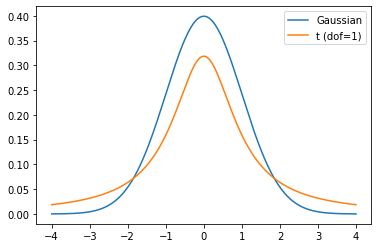

In [11]:
x=np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='Gaussian')
plt.plot(x,t1.pdf(x),label='t (dof=1)')
plt.legend();

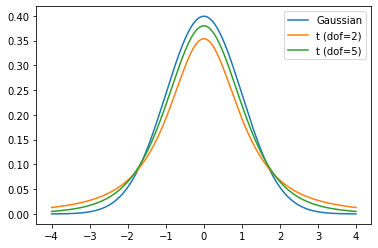

In [12]:
x=np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='Gaussian')
plt.plot(x,t2.pdf(x),label='t (dof=2)')
plt.plot(x,t5.pdf(x),label='t (dof=5)')
plt.legend();

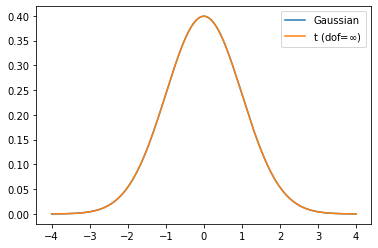

In [13]:
x=np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x),label='Gaussian')
plt.plot(x,tinf.pdf(x),label='t (dof=$\infty$)')
plt.legend();

## Example: Analytical Test on Difference of Means (T-Test)

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("firearms-urban.csv")
df.head()

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0


Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [16]:
# Use the STATE column as the index
df= df.set_index("STATE")
df.loc['FL']

RATE-2014        11.5
Percent Urban    91.2
Name: FL, dtype: float64

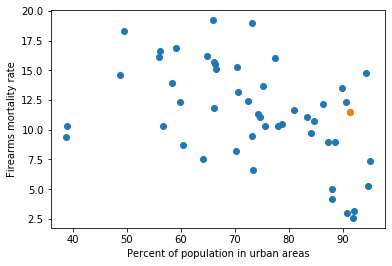

In [18]:
plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'])
plt.xlabel('Percent of population in urban areas')
plt.ylabel('Firearms mortality rate');

In [19]:
urban=df[df['Percent Urban']>80]['RATE-2014']
rural=df[df['Percent Urban']<=80]['RATE-2014']
pooled=df['RATE-2014']

In [21]:
urban.mean(),rural.mean()

(8.677777777777777, 12.993750000000002)

In [23]:
np.median(urban),np.median(rural)

(9.35, 12.8)

In [22]:
diff=rural.mean()-urban.mean()
diff

4.315972222222225

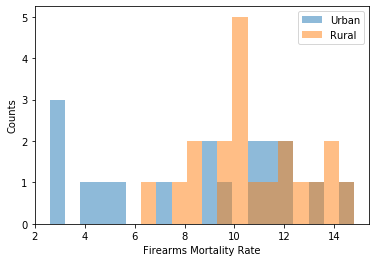

In [20]:
counts,mybins,patches=plt.hist(urban,bins=20,alpha=0.5,label="Urban")
plt.hist(rural,bins=mybins,alpha=0.5,label="Rural")
plt.xlabel("Firearms Mortality Rate");plt.ylabel("Counts"); plt.legend();

* Let's construct a **two-sided binary hypothesis test** using analytical techniques and determine the probability of such a large difference in means under the null hypothesis.

The data comes from a single distribution, which implies same means and same variances.

So, we will use the **T-random variable** to model this. We know: mean of $T$ is 0, and we need to calculate the variance from the data.

In [24]:
pooled_mean=pooled.mean()
pooled_mean

11.440000000000003

In [26]:
np.sum((pooled-pooled_mean)**2)/(len(pooled)-1)

17.220408163265304

In [27]:
pooled_var=np.var(pooled,ddof=1)
pooled_var

17.22040816326531

In [28]:
# We need to caLculate the variance of the difference of sample mean estimators
sm_var=pooled_var*(1/len(urban)+1/len(rural))
sm_var

1.4948270975056694

In [29]:
# Last parameter of T: degrees of freedom
dof = len(pooled)-2
dof = (len(urban)-1) + (len(rural)-1)

**Way 1:**

In [40]:
myt=stats.t(dof)

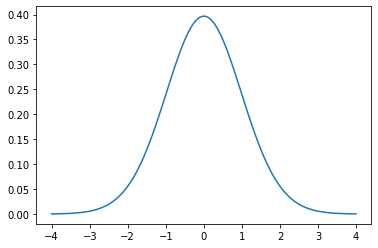

In [41]:
t=np.linspace(-4,4,100)
plt.plot(t, myt.pdf(t));

In [34]:
diff/np.sqrt(sm_var)

3.530068720144798

In [35]:
#1-sided test
myt.sf(diff/np.sqrt(sm_var))

0.0004639918961189169

In [36]:
# 2-sided test
2*myt.sf(diff/np.sqrt(sm_var))

0.0009279837922378338

In [37]:
# other 1-sided
myt.cdf(-diff/np.sqrt(sm_var))

0.0004639918961189169

**Way 2:**

In [42]:
myt=stats.t(dof,scale=np.sqrt(sm_var))
# We set the variance of the T random variable here, rather than scaling in the .sf() method

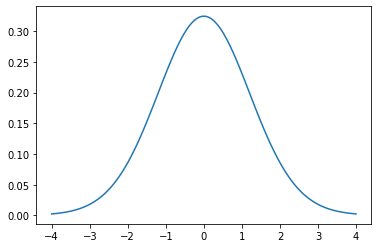

In [43]:
t=np.linspace(-4,4,100)
plt.plot(t, myt.pdf(t));
# Note that this is slightly different than before
# because of the increased variance

In [44]:
# 1-sided test
myt.sf(diff)
# We don't need to scale diff any more!
# I feel like this is easier to understand

0.0004639918961189169

In [45]:
# 2-sided test
2*myt.sf(diff)

0.0009279837922378338

In [46]:
# other 1-sided
myt.cdf(-diff)

0.0004639918961189169

# In-Class Assignment

Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.